# Congressional Voting Records 1984

A contiinuación se describen pasos generales en la forma en que normalmente se lleva a cabo el pre-procesado de los datos, se muestran los pasos y ademas se hace uso del dataset "Congressional Voting Records 1984", el cual se puede obtener y detallar en este sitio:

http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

Primeramente procedemos a cargar las librerias necesarias:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

Cargamos el archivo:

In [2]:
houses_votes = pd.read_csv("house-votes-84.data")

Visualizamos las primeras lineas:

In [3]:
houses_votes.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


Notamos como el dataset presenta una serie de problemas, por ejemplo, se nota como no cuenta con los nombres de las columnas, por otro lado, las variables parecen ser "yes" o "no", esto puede representar un problema ya que desde la perspectiva del algoritmo equivale a simplemente un caracter. Finalmente, notamos también como algunos datos no existen y se han representado con el simbolo "?", de nuevo, un caracter sin validez para los algotimos.  

Iniciamos con la colocacion de las columnas:

In [4]:
column_names = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']

In [5]:
houses_votes = pd.read_csv("house-votes-84.data", names = column_names)

In [6]:
houses_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Observamos como ya disponemos de valores en las columnas, ahora continuamos con la substitucion de "y" y "n" por "1" y "0", tomando ventaja de que corresponde a variables binarias: 

In [7]:
houses_votes.replace(to_replace='y', value = 1, inplace = True)
houses_votes.replace(to_replace='n', value = 0, inplace = True)

In [8]:
houses_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


Con respecto al valor de "?", podemos optar por varias estrategias dependiendo de la cantidad de valores "?", lo normal, es hacer ese análisis y decidir si vale la pena elimiar el feature que contenga muchos valores "?" o bien, sustituirlo por algún valor de precedencia estadística como la media o la mediana, la elección de este último, de igual forma debe llevarse a cabo mediante un análisis de los datos. Para efectos ilustrativos sustituiremos en este ejercicio los valores de "?" por la media del feature al cual pertenece, el primer paso consiste en sustiruir los valores "?" por "NaN":

In [9]:
houses_votes.replace(to_replace='?', value = np.nan, inplace = True)

In [10]:
houses_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


A continuación, sustituimos los NaN por el valor de la media de su repectivo feature:

In [11]:
houses_votes.fillna(houses_votes.mean(), inplace = True)

In [12]:
houses_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


Notamos ahora como los valores de las media claramente no son 1 o 0, se procede a continuación a hacer un redondeo hacia arriba o hacia abajo:

In [13]:
houses_votes = houses_votes.round()

In [14]:
houses_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


Observamos como finalmente, el dataset toma una forma más apta para posteriores análisis incluyendo no solo visualización, sino también aprendizaje automático. A continuación un análisis visual básico, que pude replicarse para los demás features:

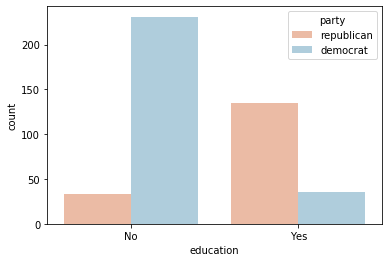

In [16]:
plt.figure()
sns.countplot(x='education', hue='party', data=houses_votes, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Media o Mediana ?

A continuación un breve análisis del uso de la mediana en casos donde hay presencia de Outliers:

In [17]:
from statistics import mean, median

Note como en el siguiente vector de datos, tenemos a 4 valores que rondan el rango de los 17-22, siendo el valor de 80 claramente un outlier.

In [18]:
data = [17, 80, 22, 16, 20]

Si calculamos la mediana, obtenemos:

In [19]:
mn = mean(data)
mn

31

Sin embargo, nótese como este valor de 31 está por encima de la media sin considerar el outlier:

In [20]:
data2 = [17, 22, 16, 20]

In [21]:
mn = mean(data2)
mn

18.75

Si ahora más bien, consideramos el vector de datos con la MEDIANA, notamos como la resultante, aun considerando el outlier, esta en el rango cercano de la media.

In [23]:
mn = median(data)
mn

20

En conclusión, se suele elegir a la **mediana** en datasets que cuentan con outliers que son verdaderos y no podemos prescindir de ellos.